# Movie Recommender with Collaborative Filtering built by TS 4 Unsupervised learning 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Comet" data-toc-modified-id="Comet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comet</a></span></li><li><span><a href="#Read-in-the-Data" data-toc-modified-id="Read-in-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the Data</a></span></li><li><span><a href="#Let's-see-what-some-of-the-best-and-worst-rated-movies-are:" data-toc-modified-id="Let's-see-what-some-of-the-best-and-worst-rated-movies-are:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Let's see what some of the best and worst rated movies are:</a></span></li><li><span><a href="#Which-genres-have-the-highest-average-rating?" data-toc-modified-id="Which-genres-have-the-highest-average-rating?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Which genres have the highest average rating?</a></span></li><li><span><a href="#Which-movie-has-the-most-polarising-effect-on-the-audience-(has-the-biggest-spread-of-review-scores)?" data-toc-modified-id="Which-movie-has-the-most-polarising-effect-on-the-audience-(has-the-biggest-spread-of-review-scores)?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Which movie has the most polarising effect on the audience (has the biggest spread of review scores)?</a></span></li><li><span><a href="#Building-the-recommender-system" data-toc-modified-id="Building-the-recommender-system-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Building the recommender system</a></span></li><li><span><a href="#Data-format" data-toc-modified-id="Data-format-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data format</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Data Pre-Processing</a></span></li><li><span><a href="#Filtering-Data-Set" data-toc-modified-id="Filtering-Data-Set-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Filtering Data Set</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Matrix-Factorization" data-toc-modified-id="Matrix-Factorization-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Matrix Factorization</a></span></li><li><span><a href="#Singular-Value-Decomposition-(SVD)" data-toc-modified-id="Singular-Value-Decomposition-(SVD)-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Singular Value Decomposition (SVD)</a></span></li><li><span><a href="#Number-of-Factors-and-RMSE" data-toc-modified-id="Number-of-Factors-and-RMSE-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Number of Factors and RMSE</a></span></li><li><span><a href="#Training-SVD-Algorithm-and-Predictions" data-toc-modified-id="Training-SVD-Algorithm-and-Predictions-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Training SVD Algorithm and Predictions</a></span></li><li><span><a href="#Prediction-and-Historical-Reference" data-toc-modified-id="Prediction-and-Historical-Reference-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Prediction and Historical Reference</a></span></li><li><span><a href="#SVD-Recommendations" data-toc-modified-id="SVD-Recommendations-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>SVD Recommendations</a></span></li><li><span><a href="#Now-let's-read-in-our-test-set" data-toc-modified-id="Now-let's-read-in-our-test-set-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Now let's read in our test set</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#This-work-would-not-have-been-possible-with-some-extensive-assistance-from-various-sources,-please-see-below:" data-toc-modified-id="This-work-would-not-have-been-possible-with-some-extensive-assistance-from-various-sources,-please-see-below:-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>This work would not have been possible with some extensive assistance from various sources, please see below:</a></span></li><li><span><a href="#Reference-list" data-toc-modified-id="Reference-list-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Reference list</a></span></li></ul></div>

It is true the recommender systems have become part of our daily lives and even if we don't know, we might be using it since companies are using it when we make use of online services. Recommender systems are used in innovative ways to suggest things people might want to buy or movies to watch and what people we might add to ur social network. 

Recommender Systems aims to achieve 2 things - from customer/user perspective, getting accurate recommendations means less time is spent searching for the correct item and less time is wasted on incorrect items and this improves the user experience. If we look at it from the service provider perspective, users are more likely to interact if the experience is good. More accurate recommendations lead to more interactions and higher revenue. In the words of Amazon's founder - "we want to provide customers with products and services before they even know they need them." A huge part of this is having highly functional recommender systems to attract customer to buy items / services they might like. 

We will explore the Movielens dataset, a repository of over 26,000,000 movie ratings given to 45,000 movies by 270,000 users. The dataset was provided by the Explore Data Science Academy.

### Data Exploration

As a first step, let us try and understand the data before we do any work on it. We can get some useful information by doing plots and analysis. As a first step, we will import the data and look at rows and columns.

In [119]:
# Comet
from comet_ml import Experiment
import warnings

import pandas as pd
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')
print("All libraries imported successfully!")

All libraries imported successfully!


### Comet

In [158]:
# Setting up comet experiment
experiment = Experiment(api_key='tkurqVVQirb76FiYYpbvSOgrz', project_name= 'recommender-system-1' ) 


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/tee-cee/recommender-system-1/45fc1e7fa519487b953349ad0360a03f
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/tee-cee/recommender-system-1/d1dd2e85102d4d0d9be8095810d5e2da



### Read in the Data

In [159]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('train.csv')

In [160]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [161]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [162]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [163]:
movies_df.info

<bound method DataFrame.info of        movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
.

In [164]:
ratings_df.info

<bound method DataFrame.info of           userId  movieId  rating   timestamp
0           5163    57669     4.0  1518349992
1         106343        5     4.5  1206238739
2         146790     5459     5.0  1076215539
3         106362    32296     2.0  1423042565
4           9041      366     3.0   833375837
...          ...      ...     ...         ...
10000033  136395    99114     5.0  1521235092
10000034  140078      553     3.0  1002580977
10000035  154807    56782     4.0  1227674807
10000036   85805      327     4.0  1479921530
10000037  139457     1009     4.0   858984862

[10000038 rows x 4 columns]>

The ratings dataframe contains the userId of the user giving the rating, the movieId of the movie being rated, the rating (ranges from 0.5 - 5 in increments of 0.5) and a timestamp of when the rating was given. There are over 10 million rows and no missing values.

The movies dataframe contains the movieId, title and a '|' delimited list of genres for each movie. There are over 62,000 rows and no missing values.

So far, so good. Let's look at the unique occurences of users and movies.

In [165]:
n_users=(ratings_df.userId.nunique()) # number of unique reviewers
n_movies=(ratings_df.movieId.nunique()) # number of unique movies
print('There are ' + str(n_users) + ' unique users.')
print('There are ' + str(n_movies) + ' unique movies.')

There are 162541 unique users.
There are 48213 unique movies.


In [166]:
max_userId = ratings_df.userId.max() # maximum value of userID
max_movieId = ratings_df.movieId.max() # maximum value of movieId
print('Max userID is ' + str(max_userId))
print('Max movieID is ' + str(max_movieId))

Max userID is 162541
Max movieID is 209171


We observe that the number of unique movies rated is less than the total number of movies with Id's, and also the maximum movie Id is much higher than the number of unique movies. This means that the movieId's are not consecutive numbers, and there are some movies without any ratings.

Let's see how the ratings are distributed.

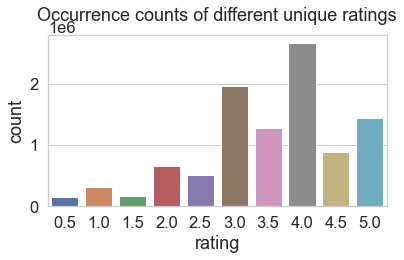

In [167]:
sns.set(font_scale=1.5, style='whitegrid')
sns.countplot(ratings_df['rating'])
plt.title('Occurrence counts of different unique ratings', y=1.05)
plt.tight_layout()

We can see that 4 stars is the most common review score with close to 3m occurrences and it seems 1.5 and 0.5 stars are the least common occurrences. Interestingly, the .5 star intervals have lower frequencies than the integer star values. This could be because users are used to systems that only rate whole star ratings e.g. rate the movie on Netflix 2 or 3 out of 5 stars for example, and not 3.5. or 2.5 etc.

Let's take a look at the ratings by movie and by genre.

In [168]:
#This splits the delimited genre string into a list of genres

movies_df['genre_split'] = movies_df['genres'].apply(lambda x: x.split('|'))
movies_df.head()

,movieId,title,genres,genre_split
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [169]:
# create a list containing each list of genres

genres = list(movies_df['genre_split'])
# flatten the list of lists into a single list with duplicates

genres = [item for items in genres for item in items]

# convert to set to remove duplicates, then back to list
genres = list(set(genres))
#sort into alphabetical order
genres.sort()
genres

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

To explore the genres individually, we would like to create a new column for each genre. On a particular row if the movie was labeled with a genre then the genres column will have a 1, otherwise it will have a zero.

In [170]:
# add the new columns and initially fill with zeros

for genre in genres:
    movies_df[genre] = 0

movies_df.head()

,movieId,title,genres,genre_split,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
def genre_1hot(row):
    
    # take the split genre list from each row
    genre_list = row['genre_split']
    
    # for each genre that is in the list, make the respective column of the row equal to 1
    for genre in genre_list:
        row[genre] = 1
    
    return row

# apply to all rows, axis=1 passes the entire row into the function

movies_df = movies_df.apply(genre_1hot, axis=1)
movies_df.head()

,movieId,title,genres,genre_split,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
# genres and genre_split no longer required

movies_df.drop(['genres','genre_split'],axis=1, inplace=True)

In [173]:
# create a new column called year
# set it equal to the year extracted by the lambda function
# works by finding the last open bracket in the title and then 
# grabbing all but the last character after it (so we don't grab the close bracket)

movies_df['year'] = movies_df['title'].apply(lambda x: x.split('(')[-1][:-1])

In [174]:
# reordering the columns so that year is next to title instead of at the end

cols = movies_df.columns.tolist()
cols = cols[:2] + cols[-1:] + cols [2:-1]
movies_df = movies_df[cols]
movies_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Let's see what some of the best and worst rated movies are:

In [3]:
# create aggregated table of movies with their average ratings

avg_ratings = ratings_df[['movieId','rating']].groupby(by='movieId', as_index=False).mean()

# add a column that shows how many ratings each movie got
avg_ratings['movie_count'] = ratings_df[['movieId','rating']].groupby(by='movieId', as_index=False).count()['rating']
avg_ratings.head()

# add a column that shows how many ratings each movie got
avg_ratings['movie_count'] = ratings_df[['movieId','rating']].groupby(by='movieId', as_index=False).count()['rating']
avg_ratings.head()

NameError: name 'ratings_df' is not defined

In [176]:
# merge with movies dataframe so that we get the movie title for each movieId

avg_ratings = pd.merge(avg_ratings, movies_df[['movieId','title']], how='left', on='movieId')
print('5 Best rated movies are: \n')
print(avg_ratings.sort_values(by='rating', ascending=False).head(5))
print('5 Worst rated movies are: \n')
print(avg_ratings.sort_values(by='rating', ascending=False).tail(5))

5 Best rated movies are: 

       movieId  rating  movie_count                            title
42113   186117     5.0            1       Fat Pizza vs Housos (2014)
35223   165199     5.0            1  The Fearless Young Boxer (1979)
40065   179607     5.0            1          A Moving Romance (2017)
22537   120258     5.0            1   Shaka Zulu: The Citadel (2001)
22540   120272     5.0            1                 Get Crazy (1983)
5 Worst rated movies are: 

       movieId  rating  movie_count                              title
44043   192553     0.5            1  Battle for the Lost Planet (1986)
46287   200038     0.5            1               Seven Dinners (2019)
46284   200032     0.5            1                 Shockheaded (2002)
42734   188023     0.5            1              Garde alternée (2017)
41948   185567     0.5            1         El grano de mostaza (1962)


All of the top 5 and bottom 5 movies have only had 1 review each, so the average isn't a fair representation. What happens if we limit the above ranking to movies that have at least 50 reviews?

In [177]:
print('5 Best rated movies are: \n')
print(avg_ratings[avg_ratings['movie_count'] >= 50][['title','rating','movie_count']].sort_values(by='rating', ascending=False).head(5))
print('')
print('5 Worst rated movies are: \n')
print(avg_ratings[avg_ratings['movie_count'] >= 50][['title','rating','movie_count']].sort_values(by='rating', ascending=False).tail(5))

5 Best rated movies are: 

                                  title    rating  movie_count
37118            Planet Earth II (2016)  4.517084          439
33608               Planet Earth (2006)  4.473294          674
37285                            Cosmos  4.456897          116
314    Shawshank Redemption, The (1994)  4.417624        32831
36994           Band of Brothers (2001)  4.399130          575

5 Worst rated movies are: 

                                     title    rating  movie_count
5624               Faces of Death 6 (1996)  1.184211           57
12561                Disaster Movie (2008)  1.179435          248
1740       Barney's Great Adventure (1998)  1.163522          159
6355           From Justin to Kelly (2003)  1.011236          178
8136   SuperBabies: Baby Geniuses 2 (2004)  0.823171           82


This seems about correct - we've checked sources like IMDb and Rotten Tomatoes we can see that Planet Earth has a 9.4/10 average rating and SuperBabies: Baby Geniuses 2 has an average rating of 2.0/10.

### Which genres have the highest average rating?

In [178]:
# add the average rating and rating count to the movies dataframe

movies_df = pd.merge(movies_df, avg_ratings.drop('title', axis=1), how='left', on='movieId')
movies_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,movie_count
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.889971,23062.0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.263414,9654.0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.132325,4727.0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.878099,968.0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.059165,4648.0


In [179]:
# rename the 'no genres' column because it contains brackets

movies_df.rename(columns={'(no genres listed)':'No genre'}, inplace=True)
# also rename the first element of our list of genres
genres[0] = 'No genre'

In [180]:
# empty dict to store averages in

genre_averages ={}

for genre in genres:
    # create a temporary matrix for each genre that has 2 rows
    # when the genre is 1, and when it is 0, calculating the mean for each
    temp = movies_df[[genre,'rating']].groupby(by=genre, as_index=False).mean()
    # add the value for when the genre is 1 to the dictionary
    genre_averages[genre] = temp[temp[genre] == 1]['rating'].values[0]
    
genre_averages

{'No genre': 3.0781802501123017,
 'Action': 2.9506979201143646,
 'Adventure': 3.045467920700436,
 'Animation': 3.1547810806166137,
 'Children': 3.048450639333836,
 'Comedy': 3.0686633531222296,
 'Crime': 3.1231732562278167,
 'Documentary': 3.3959171332111913,
 'Drama': 3.214231833322594,
 'Fantasy': 3.049064785110446,
 'Film-Noir': 3.325976896517685,
 'Horror': 2.669973819124744,
 'IMAX': 3.248172260421274,
 'Musical': 3.21398491248772,
 'Mystery': 3.0804013750500534,
 'Romance': 3.1903741180937137,
 'Sci-Fi': 2.8024122783057823,
 'Thriller': 2.9685105390583213,
 'War': 3.2877103902251488,
 'Western': 3.0868148815103935}

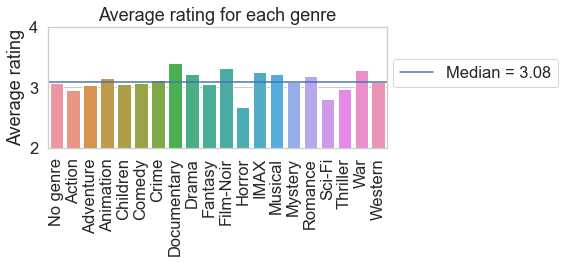

In [181]:
sns.barplot(x=list(genre_averages.keys()), y=list(genre_averages.values()))
plt.xticks(rotation=90)
plt.title('Average rating for each genre')
plt.ylabel('Average rating')
plt.ylim((2,4))
plt.axhline(y=np.median(list(genre_averages.values())), label='Median = ' + str(round(np.median(list(genre_averages.values())),2)))
plt.tight_layout()
plt.legend(loc=(1.02, 0.5))

We can see from the above plot that the median average genre rating is 3.08. Documentaries have the highest average ratings (3.5) and Horror movies have by far the lowest average ratings (2.5).

It is worth noting that each movie is weighted the same in this calculation, so a movie with 1 review has the same weight as a movie with 10,000 reviews. Also many movies have multiple genres and are included in the calculation for each.

### Which movie has the most polarising effect on the audience (has the biggest spread of review scores)?

In [182]:
# groupby movieId again but this time calculate the standard deviations

deviations = ratings_df[['movieId','rating']].groupby(by='movieId', as_index=True).std()
deviations['movie_count'] = ratings_df[['movieId','rating']].groupby(by='movieId', as_index=True).count()['rating']
deviations.rename(columns={'rating':'std'}, inplace=True)
deviations.sort_values(by='std', ascending=False, inplace=True)
# again limit to movies with at least 50 ratings
deviations[deviations['movie_count'] >= 50].head()

,std,movie_count
movieId,,
1311,1.731972,61
74754,1.660657,249
50703,1.659012,61
51372,1.577237,67
59295,1.572540,60


In [183]:
# take the movieId of the movie with the highest standard deviation

largest_std = deviations[deviations['movie_count'] >= 50].iloc[0].name
print(movies_df[movies_df['movieId']==largest_std]['title'].values[0] + ' has:')
print('Average rating of ' + str(avg_ratings[avg_ratings['movieId']==largest_std]['rating'].values[0]))
print('Deviation of ' + str(deviations.loc[largest_std]['std']))

Santa with Muscles (1996) has:
Average rating of 2.5163934426229506
Deviation of 1.7319719327853682


"Santa with muscles" has an average rating more or less in the middle of the scale and the standard deviation that is equal to a large proportion of the distance from the mean to the maximum and minimum possible scores. Let's take a closer look at the distribution.

Text(0.5, 1.05, 'Rating distribution for "Santa with Muscles (1996)"')

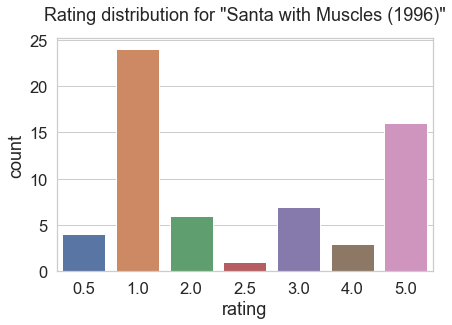

In [184]:
sns.countplot(ratings_df[ratings_df['movieId'] == largest_std]['rating'])
plt.title('Rating distribution for "Santa with Muscles (1996)"', y=1.05)

We can see that "Santa with muscles" was very polarising among reviewers, with the vast majority of votes being either 1.0 or 5.0. This is a Christmas movie starring former Wrestler Hulk Hogan, so it's safe to assume that the movie is terrible and the 5.0 ratings are ironic/sarcastic ratings or there are a lot of Hulk Hogan fans that use MovieLens. This is our understanding 

### Building the recommender system 

There are a few different types of recommender system, which we will briefly discuss here:

- ***Popularity based*** : Simplest form of recommender system, will recommend that users watch the highest rated movies, because on average these have the highest probability of being liked. This works in some situations (for example YouTube Trending simply recommends the most viewed/liked videos from a certain timeframe).



- ***Content based*** : This type looks at the features of a movie (e.g. the genres, the release year, actors, producer/director) to define a similarity metric between movies. It then looks at movies the user has rated highly and recommends the most similar movies. The drawbacks of this system are that detailed information is required about each movie and similar features do not necessarily guarantee a similar quality of movie (e.g. recommending 'Sinbad: Legend of the Seven Seas', a pretty bad cartoon movie, to someone who has given 'Fight Club' a high rating based on the fact that they both have Brad Pitt in would probably not result in a happy user). An example of this is TakeAlot's Products related to this item' section on a product page.



- ***Collaborative filtering*** : This type of recommender looks at the past ratings of users or movies to find users or movies that have a similar rating history. For 2 similar users, User A and User B, it can then recommend movies that User A liked but User B hasn't seen to User B, and vice-versa for User A. For 2 movies that have similar rating histories, Movie A and Movie B, if a user gives Movie A a high rating then the system will likely recommend Movie B to them. This results in very personalised recommendations. An example of this is TakeAlot's Customers who bought this item also bought' section on a product page. Collaborative filtering systems suffer from 'cold-start' issues, where a user has no history and so it is difficult to tell who similar users are.



In reality, productionised recommendation systems use Hybrid combinations of the above types to provide an optimal experience for users, combining the strengths and eliminating the weaknesses of the 3 types.

We will be constructing a collaborative filtering system to recommend movies, as we don't have too many features for the movies and we can remove reviewers that reviewed less than a threshold number of movies to get rid of the cold-start problem.

### Data format


To create a collaborative filtering system we need the data in a specific format. We want to create a matrix where a row relates to a specific user and a column relates to a specific movie. This will have shape (n_users, n_movies).

Then, by either looking at the similarity between rows or the similarity between columns we can implement a User based filtering system or a Movie based filtering system. The user similarity matrix will have shape (n_users, n_users) and the movie similarity matrix will have shape (n_movies, n_movies).

These matrices have very large dimensions for this dataset. In fact they will be far too large to fit into the memory of a laptop (16GB) for example 

The rating matrix is fairly sparse and so can be stored in a more memory efficient datastructure, but the similarity matrices are completely non-sparse if all users and movies have ratings. For this reason we are significantly reducing the size of the data set for our recommendation system.

### Data Pre-Processing

In [185]:
# only keeping the first 500k ratings due to memory restrictions

ratings_df = pd.read_csv('train.csv')
ratings_df = ratings_df.iloc[:500000]

In [186]:
# create a count of ratings per user

user_rating_counts = ratings_df[['userId','rating']].groupby(by='userId', as_index=False).count()
user_rating_counts['user_counts'] = user_rating_counts['rating']
user_rating_counts.drop('rating', axis=1, inplace=True)
user_rating_counts.head()

,userId,user_counts
0,1,1
1,2,3
2,3,17
3,4,3
4,5,1


In [187]:
# create a count of ratings per movie

movie_rating_counts = ratings_df[['movieId','rating']].groupby(by='movieId', as_index=False).count()
movie_rating_counts['movie_counts'] = movie_rating_counts['rating']
movie_rating_counts.drop('rating', axis=1, inplace=True)
movie_rating_counts.head()

,movieId,movie_counts
0,1,1158
1,2,478
2,3,219
3,4,46
4,5,236


### Filtering Data Set

Firstly, it is essential to filter out movies and users with low exposure to remove some of the noise from outliers. According to the official MovieLens documentation, all selected users have rated at least 20 movies in the data set. However, the following code filters out the movies and users based on an arbitrary threshold and creates a new data frame ratings_flrd_df. Moreover, the chunk also prints the value of deleted movies with new and old dimensions.

In [188]:
min_movie_ratings = 50 # the minimum number of times a movie was rated
min_user_ratings =  10 # the minimum number of ratings for a user


ratings_flrd_df = ratings_df.groupby("movieId").filter(lambda x: x['movieId'].count() >= min_movie_ratings)
ratings_flrd_df = ratings_flrd_df.groupby("userId").filter(lambda x: x['userId'].count() >= min_user_ratings)



"{0} movies deleted; all movies are now rated at least: {1} times. Old dimensions: {2}; New dimensions: {3}"\
.format(len(ratings_df.movieId.value_counts()) - len(ratings_flrd_df.movieId.value_counts())\
        ,min_movie_ratings,ratings_df.shape, ratings_flrd_df.shape )

'15976 movies deleted; all movies are now rated at least: 50 times. Old dimensions: (500000, 4); New dimensions: (106743, 4)'

### Data Loading
While using Surprise, one can use a bunch of built-in datasets (e.g. movielens) parsed by Dataset module. However, it is usually required to build a customized recommender system. In a case as such, it is necessary to upload your own rating dataset either from a file (e.g. csv) or from a pandas' dataframe. In both cases, you need to define a Reader object to parse the file or the dataframe by Surprise. See the reference here.

In the next step, one must load the data set through the call of a particular method of surprise.Dataset. Specifically, load_from_file() loads a csv file. Surprise also allows to upload pandas' DataFrame. This time, it is required to upload the data frame with ratings by user per movie (i.e. in the tidy format) with Dataset.load_from_df and specify reader as the argument.

Lastly, build_full_trainset() method builds the training set from the entire data set. As demonstrated later, training on the whole data while using the best hyper tuning parameters is useful for the prediction of top arbitrary number of movies for each userId.

In [5]:
from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF

np.random.seed(42) # replicating results

NameError: name 'np' is not defined

In [ ]:
reader = Reader(rating_scale=(0.5, 5)) #line_format by default order of the fields
data = Dataset.load_from_df(ratings_flrd_df[["userId",	"movieId",	"rating"]], reader=reader)

trainset = data.build_full_trainset()

testset = trainset.build_anti_testset()

The following sections aim to explain particular methods of matrix factorization. Since SVD is the first model to be examined, the scope differs a little. To avoid copy-pasting long chunks of code, we will briefly explain two useful generic functions for a.) performance evaluation and b.) predictions.


### Matrix Factorization 

Hopcroft and Kannan (2012), explains the whole concept of matrix factorization on customer data where m customers buy n products. The authors explain collaborative filtering in a comprehensive language. For demonstrative purposes, the author of this article demonstrates the concept on a specific case.

Matrix factorization is an effective Content Filtering technique because it benefits from the properties of linear algebra. Specifically, consider matrix R  as a record of various elements. As it is possible to decompose any integer into the product of its prime factor, matrix factorization also enables humans to explore information about matrices and their functional properties an array of elements


### Singular Value Decomposition (SVD)

SVD decomposes any matrix into ***singular vectors*** and singular values. If you have previous experience with machine learning, particularly with dimensionality reduction, you would find traditional use of SVD in Principal Component Analysis (PCA). Simply put, SVD is equivalent to PCA after mean centering, i.e. shifting all data points so that their mean is on the origin


### Number of Factors and RMSE
For the demonstrative purpose, we will examine the effect of number of latent factors k on the model's performance. Specifically, it is possible to visually observe the effect of multiple factors on error measurement. As in supervised machine learning, cross_validate computes the error rate for each fold. The following function computes the average of RMSE given by the five folds and append the empty list rmse_svd. Consequently, the list contains 100 measures of min RMSE given 100 consecutive values of k in each test set, and by five folds in every iteration.

In [1]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 100, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [3]:
rmse_svd = rmse_vs_factors('SVD',data)

NameError: name 'data' is not defined

To replicate the plot of performance for each subsequent model, the following chunk defines the function plot_rmse() with two arguments where rmse is a list of float values and algorithm is an instantiated matrix factorization model. The function returns a plot with two line subplots that display performance vs. numbers of factors. The second subplot only zooms in and marks k with the best performance, i.e. the minimum RMSE.

In [97]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

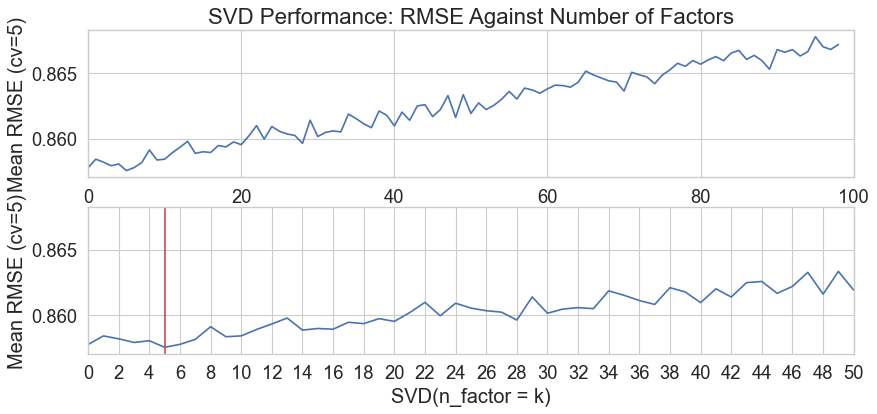

In [98]:
plot_rmse(rmse_svd,"SVD")

In [99]:
param_grid = {'n_factors': [4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8576396980825519
{'n_factors': 4}


To make the model generalizable, i.e. avoid over and underfitting, the grid algorithm finds n_factors = 4 optimal.

### Training SVD Algorithm and Predictions

Next, SVD(n_factors = 4) fits the model on trainset. To predict values, i.e. ratings, for each empty element 
aij in the utility matrix, it is essential to specify: a.) the users and b.) particular movies that are not in the trainset. build_anti_testset() method of trainset accomplishes the goal. It returns a list of ratings (testset) that are not in the trainset or in the entire utility matrix R. Consequently, it is possible to use the fitted model and predict ratings for movies in testset. algo_SVD.test(testset)returns the list with predictions.

In [100]:
algo_SVD = SVD(n_factors = 4)
algo_SVD.fit(trainset)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo_SVD.test(testset)

# subset of the list  predictions
predictions[0:2]

[Prediction(uid=106343, iid=1997, r_ui=3.4316489137461006, est=3.724616597171489, details={'was_impossible': False}),
 Prediction(uid=106343, iid=92259, r_ui=3.4316489137461006, est=4.232193010223199, details={'was_impossible': False})]

### Prediction and Historical Reference

As we mentioned above, the raw predictions are stored in a list. It would also be difficult to search for any userId and predictions with meaningful information. For example, let's assume there are two goals: i.) suggest any userId the top 10 unseen movies the person is likely to enjoy and ii.) recommend the user movies with titles and genres. Overall, it was the author's objective to define a function with the following properties:

- Map the predictions to each user.

- Return: i.) recommendations for any given userId and ii.) the user's historical ratings

- Return the above objects with specific reference to the movie and its genre in a readable format (i.e. tidy DataFrame)

The below function get_top_n() accomplishes the goals. The function takes five arguments. Specifically, predictions is the list with predictions (predictions = algo_SVD.test(testset) ) , userId is an arbitrary user's id, movies_df is DataFrame with title and genre to each movieId, ratings_df contains historical ratings, and n specifies how many movies should be recommended to the user. By default, n is set to 10. get_top_n() consists of two main parts:


Part I. comes from the official Surprise documentation. It maps the prediction to each user, sorts them in descending order, and returns the top n (by default 10) recommended movies for the userId specified as the argument of the function.

Part II. was inspired by an article published by IVIDIA data scientist Nick Becker on his blog. It prints the total number of movies rated by the user. Then, it merges the DataFrame objects, i.e. history and predictions, on movieID in movies_df. Therefore, besides movieId both objects consequently contain title and genres. One can then holistically evaluate the model's performance on an individual level because the function's output (data frames) allows to observing both the highest rated predictions and the highest rated movies in the past. It is assumed that high rated genres should correspond to the user's taste and are therefore expected to appear in the recommended movies as well.

In [101]:
def get_top_n(predictions, userId, movies_df, ratings_df, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userId" ,"movieId","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userId"] == (userId)].merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = ratings_df[ratings_df.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
    
    
    return hist_usr, pred_usr

### SVD Recommendations
Since the model was properly trained, it is already possible to suggest any userID n movies at this stage. Additionally, based on the acquired predictions and defined get_top_n() function it is reasonable to visually inspect the recommended movies and the user's highest rated movies in the past. For instance, let's assume the userId 106343 wants to watch a movie at their earliest convenience but has no specific title in mind. On top of that, the movie database contains many titles across multiple genres so the user would spend a lot of time researching for what movies are in line with respect to their ***specific preferences***. The following code makes the user's choice much easier. After calling get_top_n() function, it is immediately obvious the user 106343 has already rated 11 movies.

In [103]:
hist_SVD_106343, pred_SVD_106343 = get_top_n(predictions, movies_df = movies_df, userId = 106343, ratings_df = ratings_df)

User 106343 has already rated 11 movies.


To see the user's history, let's examine their top 15 highest rated movies. The ratings are in the range from 5 to 4.5. As the table below shows, the user 106343 enjoys a wide range of genres. Specifically, the highest rated movies (rating 5) are mostly dramas. Additionally, the user has mostly rated comedies, thrillers, and action/adventure movies.

In [104]:
hist_SVD_106343.head(15)

,userId,movieId,rating_x,timestamp,title,year,No genre,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_y,movie_count
0,106343,5,4.5,1206238739,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.059165,4648.0
1,106343,53972,4.5,1242146342,Live Free or Die Hard (2007),2007,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,3.451422,2707.0
2,106343,2011,4.0,1206501189,Back to the Future Part II (1989),1989,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.548950,9193.0
3,106343,3624,4.0,1242146724,Shanghai Noon (2000),2000,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.268194,3710.0
4,106343,1961,4.0,1206237856,Rain Man (1988),1988,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.899856,11099.0
5,106343,3793,4.0,1206500503,X-Men (2000),2000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.561570,13099.0
6,106343,553,4.0,1206501259,Tombstone (1993),1993,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3.698115,5729.0
7,106343,3253,3.5,1206501970,Wayne's World (1992),1992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.434938,5587.0
8,106343,5308,3.5,1206238545,Three Men and a Baby (1987),1987,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.880486,1276.0
9,106343,3210,2.5,1242146765,Fast Times at Ridgemont High (1982),1982,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3.668714,3257.0


When it comes to predictions, the outcome is stored in the same order and format as the user's history.

In [105]:
pred_SVD_106343

,userId,movieId,rat_pred,title,year,No genre,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,movie_count
0,106343,318,4.692834,"Shawshank Redemption, The (1994)",1994,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4.417624,32831.0
1,106343,1203,4.561026,12 Angry Men (1957),1957,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.252351,6594.0
2,106343,1260,4.534398,M (1931),1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,4.149283,1812.0
3,106343,1217,4.508190,Ran (1985),1985,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.146495,1983.0
4,106343,3030,4.502168,Yojimbo (1961),1961,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.172930,1570.0
5,106343,1196,4.483747,Star Wars: Episode V - The Empire Strikes Back...,1980,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.146236,22956.0
6,106343,1204,4.477467,Lawrence of Arabia (1962),1962,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.147307,5329.0
7,106343,296,4.455887,Pulp Fiction (1994),1994,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,4.195097,31697.0
8,106343,306,4.446887,Three Colors: Red (Trois couleurs: Rouge) (1994),1994,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.080714,2831.0
9,106343,593,4.438245,"Silence of the Lambs, The (1991)",1991,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,4.144172,29444.0


Comparing the predictions with history, one can observe that the genres are in line with the user's taste.

In [ ]:
rmse_nmf = rmse_vs_factors(NMF, data)

In [109]:
ratings_flrd_df.head()

,userId,movieId,rating,timestamp
1,106343,5,4.5,1206238739
9,144018,1997,5.0,1109967647
11,80119,92259,3.5,1435635534
12,6063,33493,3.0,1236048966
14,55909,3978,2.5,1111555006


In [111]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_flrd_df[['userId','movieId','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.8686


0.8685769591763443

### Now let's read in our test set

In [112]:
test = pd.read_csv('test.csv')
test.sample(5)

,userId,movieId
1222611,39669,2004
640060,21115,2132
4402850,143108,119141
2075376,67356,227
2115790,68695,31658


In [113]:
# this will take a while, be patient runnint it :)

def predict_rating(row):
    u = row["userId"]
    i = row["movieId"]
    return algorithm.estimate(u, i)

test = test.assign(rating=test.apply(predict_rating, axis=1))

In [114]:
test.sample(5)

,userId,movieId,rating
4110113,133681,2297,3.433597
4867566,158121,153,3.727612
45802,1624,28,4.558103
3418731,110881,76147,3.433597
587633,19379,46530,3.433597


Now we put the prediction in the submission format they require in Kaggle, they want the Id to be simply userId_movieId

In [115]:
test = test.assign(Id=test.userId.astype(str)+"_"+test.movieId.astype(str))
submission = test[["Id", "rating"]]
submission.to_csv("sub_rec1.csv",index=None)

In [116]:
submission = pd.read_csv('sub_rec1.csv')
submission.head()

,Id,rating
0,1_2011,2.047857
1,1_4144,3.118564
2,1_5767,3.118564
3,1_6711,3.118564
4,1_7318,3.118564


### Conclusion 

The Surprise pacakge was used for the matrix factorization approach. SVD achieved RMSE of 0.8685. The model was hyper paramatized for several latent factors used in training of the algorithms. We also showed how to evaluate the model on an individual level by observing the predicted movies and the user's historical rating.

### This work would not have been possible with some extensive assistance from various sources, please see below:

### Reference list


- Mills, P.(2017, October, 5). Singular Value Decomposition (SVD) Tutorial: Applications, Examples, Exercises. A complete tutorial on the singular value decomposition method. Retrieved from https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254


- Becker, N.(2016, November, 10). Matrix Factorization for Movie Recommendations in Python. Retrieved from https://beckernick.github.io/matrix-factorization-recommender/


- Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872


- Kane, F.(n.d.) - Building Recommender Systems with Machine Learning and AI. Course available on www.udemy.com